# Traitement d'images : filtrage, seuillage, et comptage d'objets avec opencv

Une initiation à la biblithèque opencv 

# Veille technologique: Opencv python

-  Suivre les instructions et faire une recherche selon ce qui est demandé.

## Operations Simples

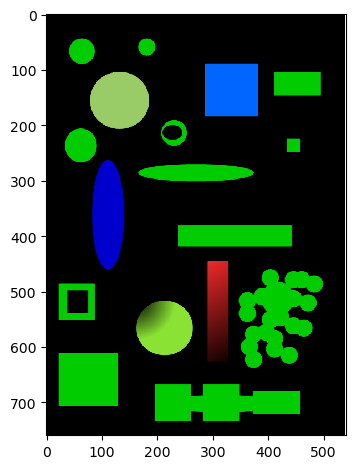

In [2]:
# use opencv to load and display the image
import cv2
import matplotlib.pyplot as plt
import numpy as np
# import skimage as sk
from skimage.io import imread, imshow, imsave

# lire l'image (avec imread)
image = imread("./Img/image_01.png")
# afficher image
imshow(image)

In [3]:
# afficher la taille de l'image
image.shape

(760, 541, 4)

In [4]:
# l'image a trois couleur R,G,B. afficher les valeurs des trois couleurs pour le pixel x = 150, et y = 100
image[150, 100]

array([153, 204, 102, 255], dtype=uint8)

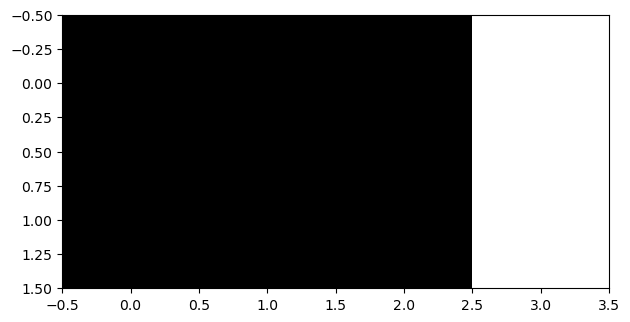

In [5]:
# Crop une partie de l'image (sélectionner une petite partie à partir des coordonnées)
cropped_image = image[[100, 200], [100, 100]]
imshow(cropped_image)

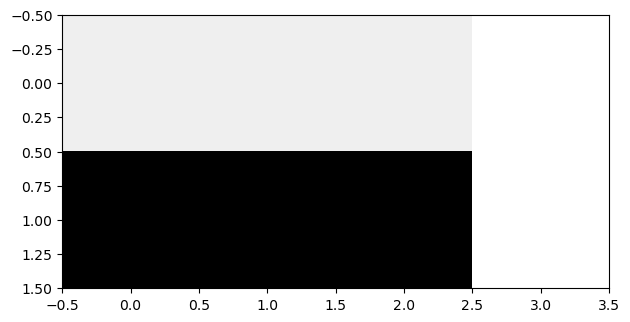

In [6]:
# redimensioner l'image à 200x200 pixels
resized = image[[0, 200], [0, 200]]
# afficher resized
imshow(resized)
# qu'est ce que vous remarquez !!


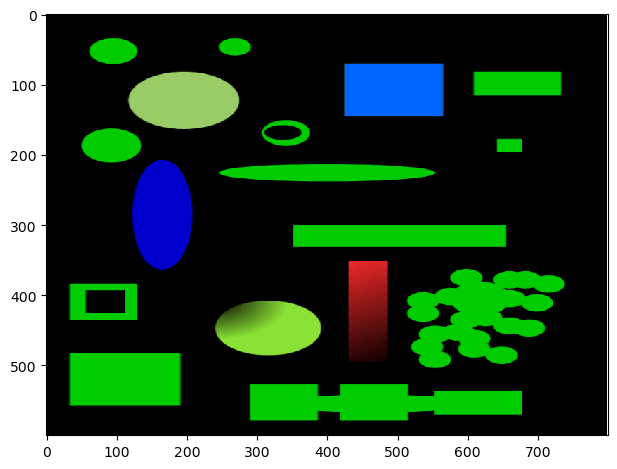

In [7]:
# redimensinner sans affecter l'image
resized_image = cv2.resize(image, (800, 600))
imshow(resized_image)

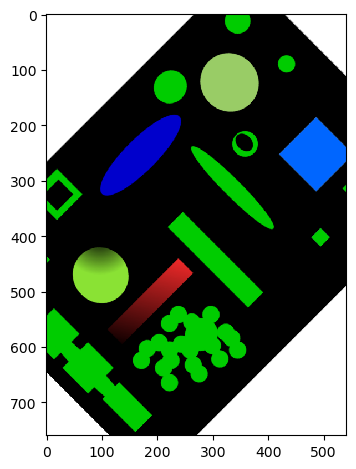

In [8]:
# faire tourner une image -45°
rows, cols, _ = image.shape
rotation = cv2.getRotationMatrix2D((cols/2, rows/2), -45, 1)
rotated = cv2.warpAffine(image, rotation, (cols, rows))
imshow(rotated)

Vous pouvez utiliser la bibliothèque imutils pour faire les rotations et d'autres fonctions facilement. Pour l'instaler: pip install imutils

# Dessiner sur l'image

In [9]:
# dessiner un rectangle

# Création d'une image noire
img = np.zeros((512,512,3), np.uint8)

# Définition des coordonnées du rectangle (x1,y1) et (x2,y2)
x1, y1 = 100, 100
x2, y2 = 400, 400

# Dessin du rectangle sur l'image
cv2.rectangle(img, (x1, y1), (x2, y2), (0,255,0), 2)

# Affichage de l'image
cv2.imshow("Rectangle", img)

# Attente d'une touche pour fermer la fenêtre
cv2.waitKey(0)

# Fermeture de toutes les fenêtres
cv2.destroyAllWindows()

In [10]:
# dessiner un circle

# Création d'une image noire
img = np.zeros((512,512,3), np.uint8)

# Définition des coordonnées du centre du cercle et de son rayon
center = (256,256)
radius = 100

# Dessin du cercle sur l'image
cv2.circle(img, center, radius, (0,0,255), 2)

# Affichage de l'image
cv2.imshow("Cercle", img)

# Attente d'une touche pour fermer la fenêtre
cv2.waitKey(0)

# Fermeture de toutes les fenêtres
cv2.destroyAllWindows()

# Filtrage d'image

* Blur
* Gaussian blur
* Median blur
* Sharpening
* Bilateral blur
* Bilateral filtering

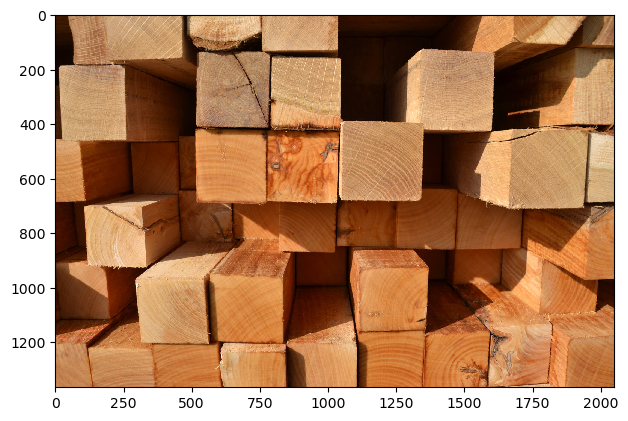

In [11]:
# charger et afficher l'image "bois"
bois = imread("./Img/bois.png")
imshow(bois)

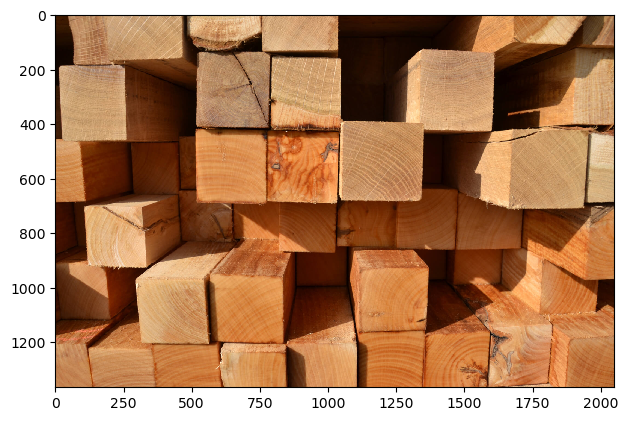

In [12]:
# Utiliser la méthode "cv2.filter2D" avec un kernel de taille 2
# Définition du noyau
kernel = np.array([[1, 1], [1, 1]], np.float32)

# Normalisation du noyau
kernel = kernel / 4.0

# Application du filtre
dst = cv2.filter2D(bois, -1, kernel)

# Affichage de l'image
imshow(dst)

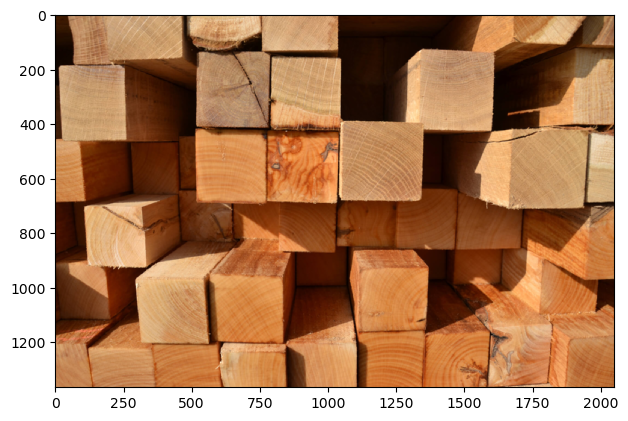

In [13]:
# Appliquer blur avec un kernel de taille 5x5
blur = cv2.blur(bois, (5,5), 0)
imshow(blur)

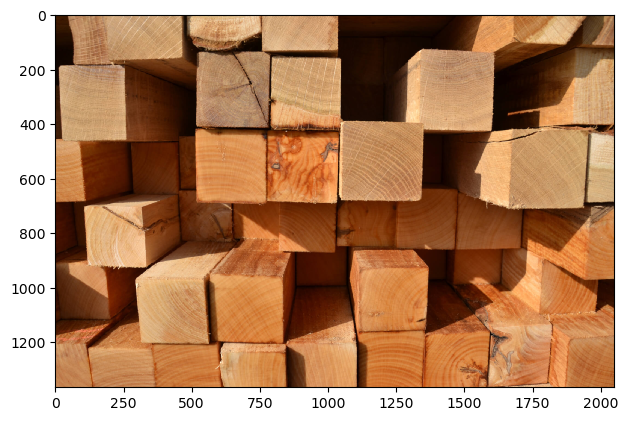

In [14]:
# gaussian blur
blur = cv2.GaussianBlur(bois, (5,5), 0)
imshow(blur)

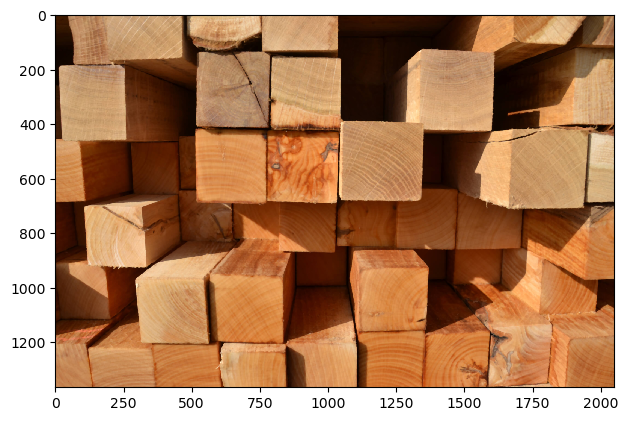

In [15]:
# median blur
blur = cv2.medianBlur(bois, 5)
imshow(blur)

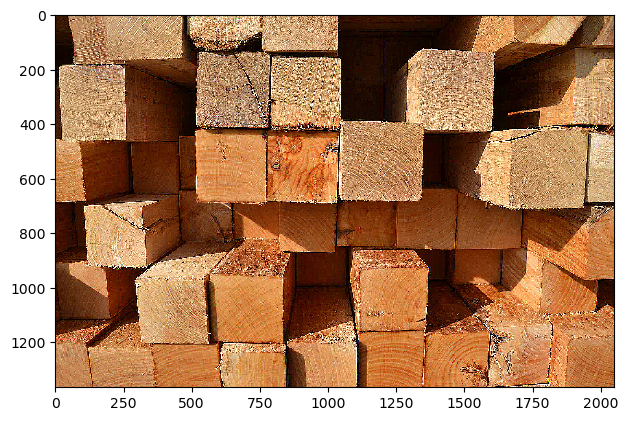

In [16]:
# sharpening
# Définition du noyau de sharpening
kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])

# Application du sharpening avec le noyau défini
sharpened = cv2.filter2D(bois, -1, kernel)

# Affichage
imshow(sharpened)

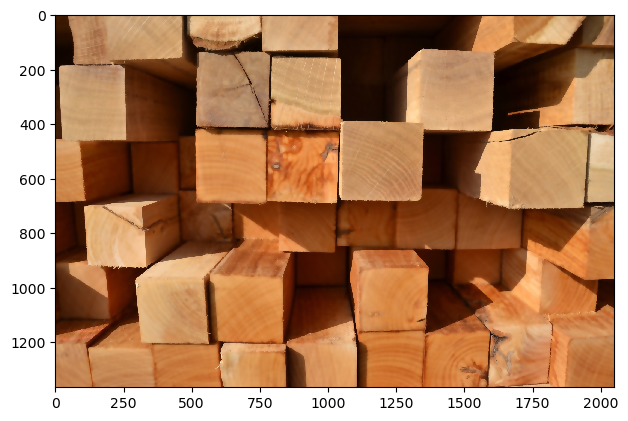

In [17]:
# bilateral filtering
bilateral = cv2.bilateralFilter(bois, 15, 75, 75)
imshow(bilateral)

# Seuillage d'image

En utilisant l'image "sudoku" appliquer:
* Binary Thresholding
* Otsu thresholding
* Adaptive thresholding

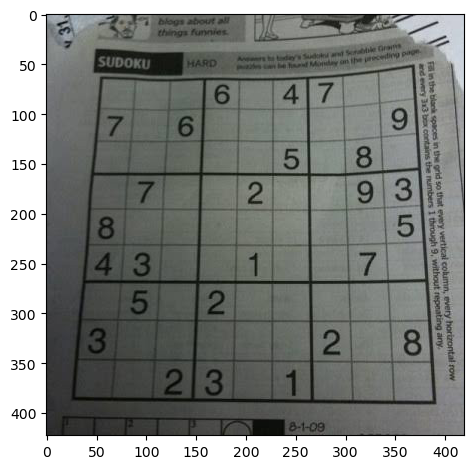

In [18]:
# chargement sudoku.jpg
sudoku = imread("./Img/sudoku.jpg")

# Affhichage sudoku.jpg
imshow(sudoku)

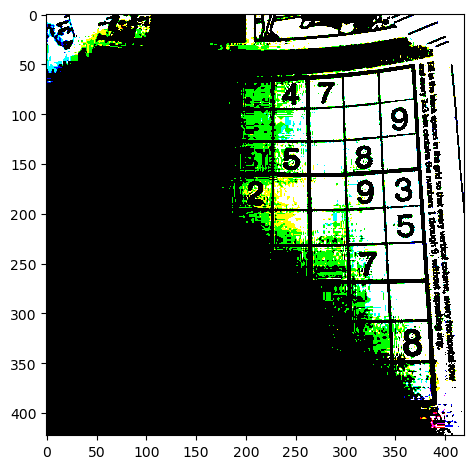

In [19]:
# appliquer un seuillage binaire d'un seuil de 127
ret, seuil = cv2.threshold(sudoku, 127, 255, cv2.THRESH_BINARY)

imshow(seuil)

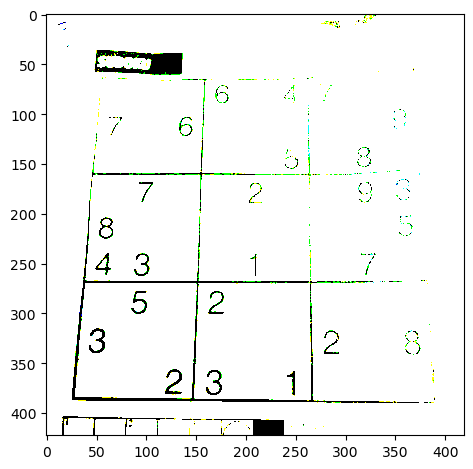

In [20]:
# appliquer un seuillage binaire d'un seuil de 30
ret, seuil = cv2.threshold(sudoku, 30, 255, cv2.THRESH_BINARY)

imshow(seuil)


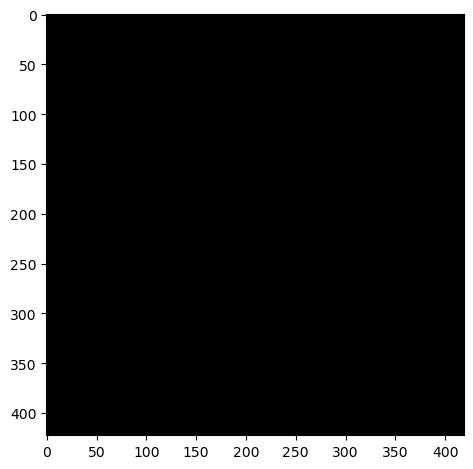

In [21]:
# appliquer un seuillage binaire d'un seuil de 240
ret, seuil = cv2.threshold(sudoku, 240, 255, cv2.THRESH_BINARY)

imshow(seuil)


Qu'est ce que vous remarquez ?!

c:\Users\AxelArcidiaco\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


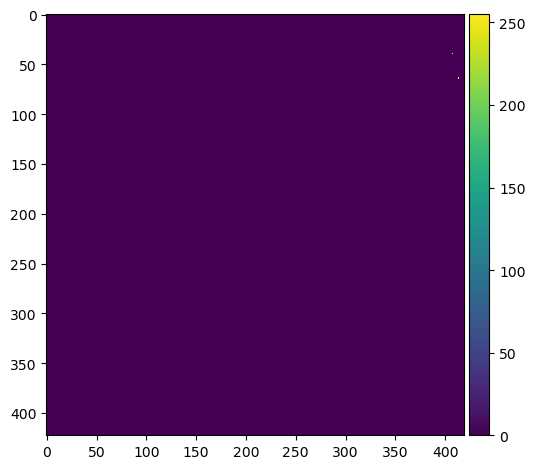

In [22]:
def otsu_threshold(image):
    # Convertir l'image en niveau de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculer l'histogramme de l'image
    hist = cv2.calcHist([gray],[0],None,[256],[0,256])

    # Calculer la variance interclasse maximale (Méthode d'Otsu)
    total_pixels = gray.shape[0] * gray.shape[1]
    sum_all = np.sum(hist)
    sumB = 0
    wB = 0
    maximum_variance = 0.0
    threshold = 0
    for i in range(256):
        wB += hist[i]
        if wB == 0:
            continue
        wF = total_pixels - wB
        if wF == 0:
            break
        sumB += i * hist[i]
        mB = sumB / wB
        mF = (sum_all - sumB) / wF
        variance_between = wB * wF * (mB - mF) ** 2
        if variance_between > maximum_variance:
            maximum_variance = variance_between
            threshold = i

    # Seuiller l'image à la valeur du seuil calculé
    ret, thresh = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    return thresh

imshow(otsu_threshold(sudoku))

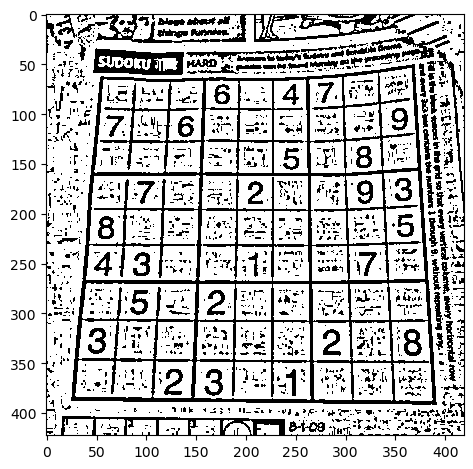

In [23]:
# appliquer "Adaptive threshold"

def adaptive_threshold(image, block_size, constant):
    # Convertir l'image en niveau de gris
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Appliquer le seuillage adaptatif
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, block_size, constant)

    return thresh

imshow(adaptive_threshold(sudoku, 11, 2))

# Détection des bords

* Sobel
* Canny

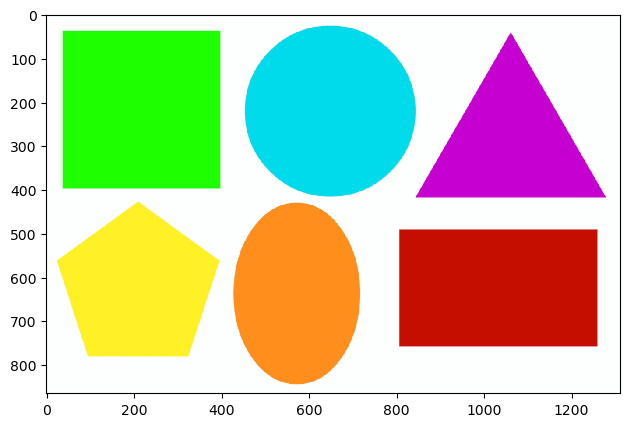

In [24]:
img2 = imread("./Img/image_02.png")
imshow(img2)

In [25]:
# utiliser la methode sobel pour détecter les bords
# Vous pouvez utiliser d'autres images de votre choix

# Calculer le gradient en utilisant la méthode Sobel
dx = cv2.Sobel(img2, cv2.CV_64F, 1, 0)
dy = cv2.Sobel(img2, cv2.CV_64F, 0, 1)

# Calculer la magnitude et l'angle du gradient
mag = np.sqrt(dx**2 + dy**2)
angle = np.arctan2(dy, dx)

# Seuiller l'image pour supprimer le bruit
mag[mag < 50] = 0

# Afficher l'image seuillée
cv2.imshow("Edges", mag)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [39]:
# Canny
img = imread("./Img/image_01.png")

# Appliquer la méthode de Canny
edges = cv2.Canny(img, 100, 200)

# Afficher l'image avec les bords détectés
cv2.imshow("Edges", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Détection des contours

In [27]:
# charger l'image 02
# faites une recherche sur internet pour détecter les contours des objets dans image_02

# Appliquer la méthode de Canny
edges2 = cv2.Canny(img2, 100, 200)

# Trouver les contours dans l'image
contours, hierarchy = cv2.findContours(edges2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Dessiner les contours sur l'image originale
cv2.drawContours(img2, contours, -1, (0, 0, 0), 2)

# Afficher l'image avec les contours dessinés
cv2.imshow("Contours", img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#  Compter des objets

In [48]:
import cv2

# Charger l'image
image = cv2.imread('./Img/image_02.png')

# Convertir l'image en niveaux de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Appliquer un seuillage pour binariser l'image
ret, threshold_image = cv2.threshold(gray_image, 127, 255, 0)

# Trouver les contours des objets dans l'image
contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Compter le nombre de contours détectés
nombre_objets = len(contours)

# Afficher le nombre d'objets détectés
print("Nombre d'objets détectés : ", nombre_objets)

Nombre d'objets détectés :  3


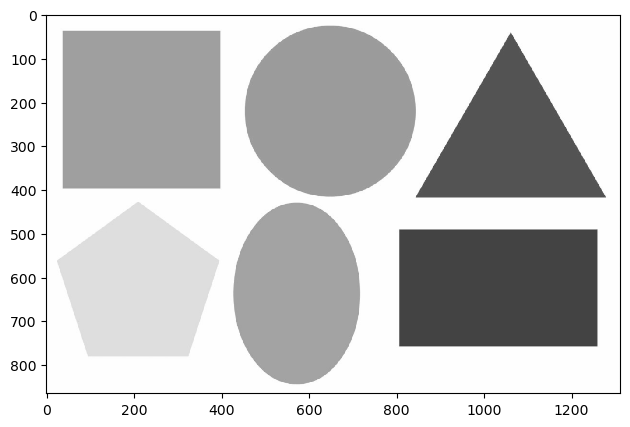

In [42]:
imshow(gray_image)

# Challenge
Compter le nombre d'objets dans l'image 03 avec le code précédent.
- Qu'est ce que vous remarquez?
- Utiliser l'algorithme Watershed pour detecter et séparer les objets connectés.

Il y a 6 objets dans l'image.


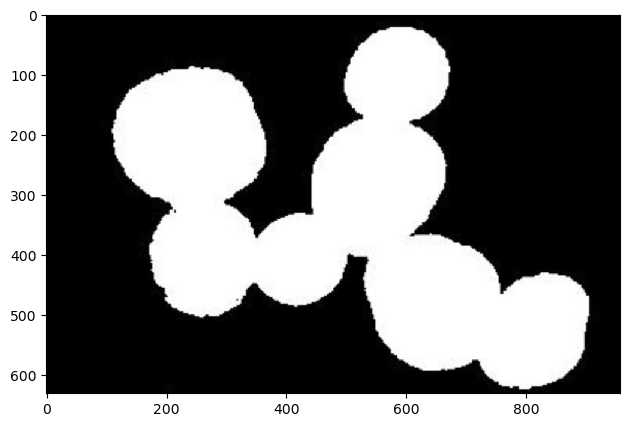

In [29]:
#
img3 = imread("./Img/image_03.jpg")
imshow(img3)

count_objects(img3)

Bravo !

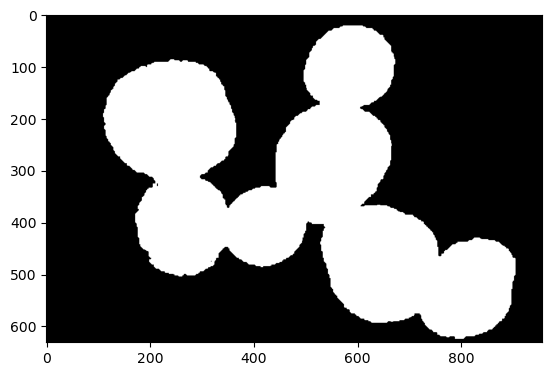

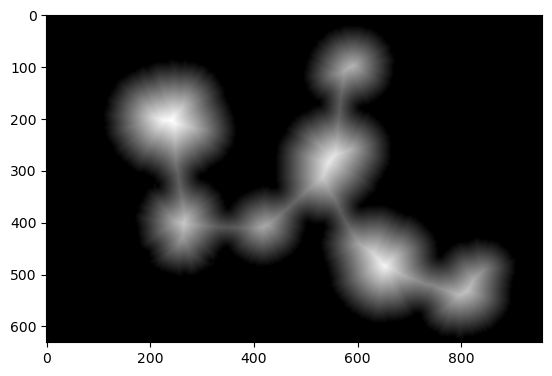

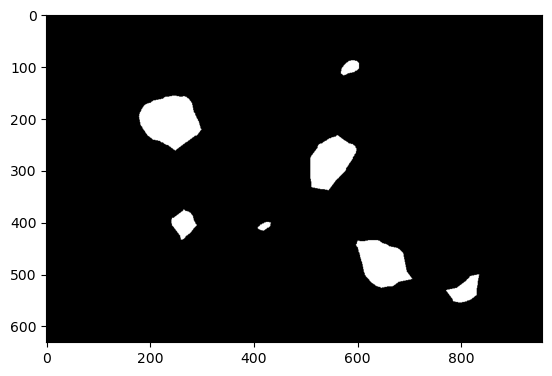

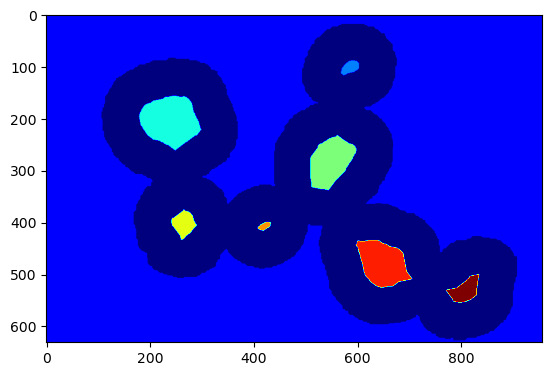

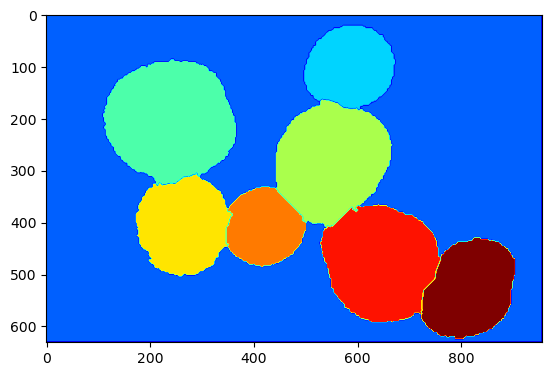

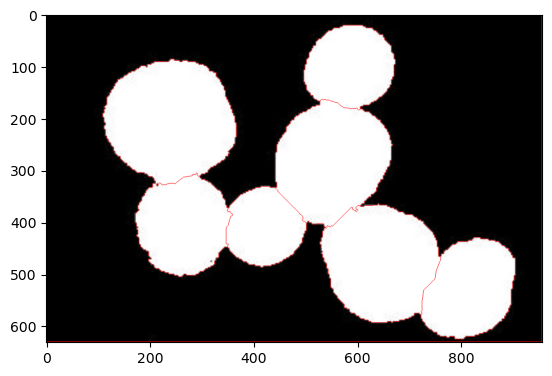

In [49]:
#
image = cv2.imread("./Img/image_03.jpg")
gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)


seuil, img_thresh = cv2.threshold(
    src=gray, thresh=0, maxval=255, type=(cv2.THRESH_BINARY + cv2.THRESH_OTSU))


# Élimination du bruit blanc
kernel = np.ones(shape=(3, 3), dtype=np.uint8)
opening = cv2.morphologyEx(img_thresh, kernel=kernel,
                           op=cv2.MORPH_OPEN, iterations=2)


# Identification du background
sure_bg = cv2.dilate(opening, kernel=kernel, iterations=3)


# Identification du premier plan
dist_transform = cv2.distanceTransform(
    opening, distanceType=cv2.DIST_L2, maskSize=5)
seuil, premier_plan_sur = cv2.threshold(dist_transform, thresh=(
    0.6*dist_transform.max()), maxval=255, type=cv2.THRESH_BINARY)


# Identification des régions inconues


plt.imshow(opening, cmap='gray')
plt.show()
plt.imshow(dist_transform, cmap='gray')
plt.show()
plt.imshow(premier_plan_sur, cmap='gray')
plt.show()


# repérages des régions incertaines
premier_plan_sur = np.uint8(premier_plan_sur)
inconues = cv2.subtract(sure_bg, premier_plan_sur)


# Création de marqueurs à partir de premier plan sur
ret, markers = cv2.connectedComponents(premier_plan_sur)


# Signalement des marqueurs
markers = markers+1


# Signalement des marqueurs inconnus
markers[inconues == 255] = 0
plt.imshow(markers, cmap='jet')
plt.show()
markers = cv2.watershed(image=image, markers=markers)
image[markers == -1] = [255, 0, 0]


plt.imshow(markers, cmap='jet')
plt.show()
plt.imshow(image, cmap='jet')
plt.show()
